# Gerando Datasets de Imagens

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Dataset Ureia (7 dias)](#dataset-ureia-7-dias)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [1]:
from utils.alterar_dataset import  deletar_valores_absurdos, preencher_valores_faltantes_linha, despivotear_dataset
from utils.gerar_grafico import gerar_dataframe_imagens_ureia_despivoteado, gerar_dataframe_imagens_ureia_pivoteado
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import io

## Importando datasets

In [2]:
df_ureia_7_dias = pd.read_csv("../databases/raw/ureia.csv", sep = ",", index_col = "subject_id")
df_creatinina_7_dias = pd.read_csv("../databases/raw/creatinina.csv", sep = ",", index_col = "subject_id")
df_ureia_15_dias = pd.read_csv("../databases/raw/Ureia15dias.csv", sep = ",", index_col = "subject_id")
df_creatinina_15_dias = pd.read_csv("../databases/raw/Creatinina15dias.csv", sep = ",", index_col = "subject_id")

## DATASET ureia (7-dias)

### Quantidade de linhas

In [3]:
df_ureia_7_dias.shape[0]

42392

Verificando possibilidade de divisão

In [4]:
df_ureia_7_dias.shape[0] / 14

3028.0

O dataset original será dividido em 14 sub-datasets, para otimização na criação das imagens

### Estrutura do dataset

In [5]:
df_ureia_7_dias.head()

,day,UreiaMaxDia
subject_id,,
15158531,1,107.0
15158531,2,100.0
15158531,3,78.0
15158531,4,59.0
15158531,15,59.0


### Verificando existências de valores não numéricos & nulos

In [6]:
df_ureia_7_dias.isna().sum()

day            0
UreiaMaxDia    0
dtype: int64

### Dividindo o dataset

In [7]:
passo = 3028
parte_1 = df_ureia_7_dias.iloc[0:passo, :]
parte_2 = df_ureia_7_dias.iloc[passo:(2*passo)]
parte_3 = df_ureia_7_dias.iloc[(2*passo):(3*passo)]
parte_4 = df_ureia_7_dias.iloc[(3*passo):(4*passo)]
parte_5 = df_ureia_7_dias.iloc[(4*passo):(5*passo)]
parte_6 = df_ureia_7_dias.iloc[(5*passo):(6*passo)]
parte_7 = df_ureia_7_dias.iloc[(6*passo):(7*passo)]
parte_8 = df_ureia_7_dias.iloc[(7*passo):(8*passo)]
parte_9 = df_ureia_7_dias.iloc[(8*passo):(9*passo)]
parte_10 = df_ureia_7_dias.iloc[(9*passo):(10*passo)]
parte_11 = df_ureia_7_dias.iloc[(10*passo):(11*passo)]
parte_12 = df_ureia_7_dias.iloc[(11*passo):(12*passo)]
parte_13 = df_ureia_7_dias.iloc[(12*passo):(13*passo)]
parte_14 = df_ureia_7_dias.iloc[(13*passo):(14*passo)]

### Despivoteando o dataset

In [8]:
df_ureia_7_dias = despivotear_dataset(df_ureia_7_dias.reset_index(inplace = False),
                                      ["subject_id"],
                                      df_ureia_7_dias.columns.to_list(),
                                      "ureia",
                                      "dia")

df_ureia_7_dias = df_ureia_7_dias.iloc[0:51]
df_ureia_7_dias.head(10)

,subject_id,dia,ureia
0,15158531,day,1.0
1,15158531,day,2.0
2,15158531,day,3.0
3,15158531,day,4.0
4,15158531,day,15.0
5,15158531,day,16.0
6,15158531,day,17.0
7,15158531,day,18.0
8,14800685,day,2.0
9,13697731,day,3.0


### Gerando DataSet de Imagens

In [ ]:
parte_1 = gerar_dataframe_imagens_ureia_pivoteado(parte_1)
parte_2 = gerar_dataframe_imagens_ureia_pivoteado(parte_2)
parte_3 = gerar_dataframe_imagens_ureia_pivoteado(parte_3)
parte_4 = gerar_dataframe_imagens_ureia_pivoteado(parte_4)
parte_5 = gerar_dataframe_imagens_ureia_pivoteado(parte_5)
parte_6 = gerar_dataframe_imagens_ureia_pivoteado(parte_6)
parte_7 = gerar_dataframe_imagens_ureia_pivoteado(parte_7)
parte_8 = gerar_dataframe_imagens_ureia_pivoteado(parte_8)
parte_9 = gerar_dataframe_imagens_ureia_pivoteado(parte_9)
parte_10 = gerar_dataframe_imagens_ureia_pivoteado(parte_10)
parte_11 = gerar_dataframe_imagens_ureia_pivoteado(parte_11)
parte_12 = gerar_dataframe_imagens_ureia_pivoteado(parte_12)
parte_13 = gerar_dataframe_imagens_ureia_pivoteado(parte_13)
parte_14 = gerar_dataframe_imagens_ureia_pivoteado(parte_14)

In [9]:
df_ureia_7_dias_imagens = gerar_dataframe_imagens_ureia_despivoteado(
    df_ureia_7_dias.set_index(
        ["subject_id"],
        inplace = False
    )
)
df_ureia_7_dias_imagens.head()

,subject_id,img_ureia
0,15158531,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,15158531,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,15158531,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,15158531,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,15158531,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


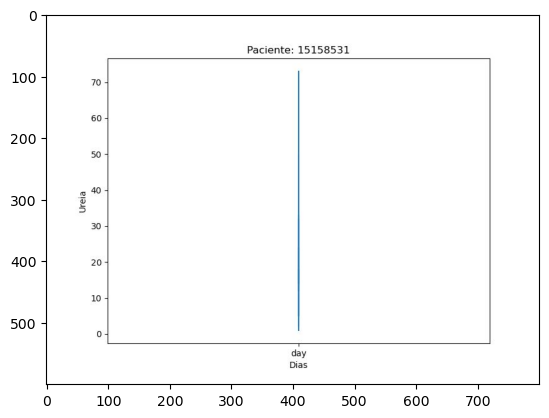

In [10]:
image_data_bytes = df_ureia_7_dias_imagens["img_ureia"][3]
image = Image.open(io.BytesIO(image_data_bytes))
plt.imshow(image)